# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import random
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, accuracy_score, mean_squared_error, r2_score, make_scorer

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# this project is a binary classification problem to predict the sex of a person -
# Female or non-Female - based and trained on Census information from 1994

In [4]:
# import data into a pandas DataFrame and print the first rows in the df
df = pd.read_csv('data/adultData.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Data inspection

In [5]:
# look at the shape of the data
df.shape

(32561, 15)

In [6]:
# Look and create a list of the features
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

In [7]:
# Create a statistical summary for all the features we have - numerical or not
df_summ = df.describe(include = 'all')
df_summ

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
# look at some statistics for the data we have (only the columns that are a number, no strings)
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


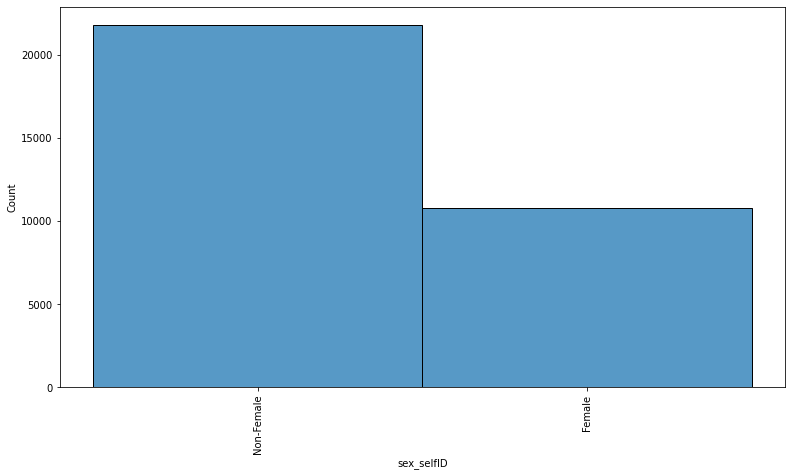

In [9]:
# Create a graph and look if we have class imbalance
fig1 = plt.figure(figsize=(13,7)) 
ax = sns.histplot(data=df, x = "sex_selfID")
t1 = plt.xticks(rotation=90)

In [10]:
# test how many unique values each features has
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'age' has 73 unique values.
Column 'workclass' has 8 unique values.
Column 'fnlwgt' has 21648 unique values.
Column 'education' has 16 unique values.
Column 'education-num' has 16 unique values.
Column 'marital-status' has 7 unique values.
Column 'occupation' has 14 unique values.
Column 'relationship' has 6 unique values.
Column 'race' has 5 unique values.
Column 'sex_selfID' has 2 unique values.
Column 'capital-gain' has 106 unique values.
Column 'capital-loss' has 92 unique values.
Column 'hours-per-week' has 94 unique values.
Column 'native-country' has 41 unique values.
Column 'income_binary' has 2 unique values.


In [11]:
# Check if there are any missing values in the df
df.isnull().values.any()

True

In [12]:
# inspect for each column how many null values it has
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [13]:
# look for all columns with missing values
condition = nan_count != 0

# get the column names and print them
col_names = nan_count[condition].index 
print("col_names:")
print(col_names)

# convert column names to list and print it
nan_cols = list(col_names) 
print("\nnan_names:")
print(nan_cols)

# look at these columns types and print them
nan_col_types = df[nan_cols].dtypes
print("\nnan_col_types:")
print(nan_col_types)

col_names:
Index(['age', 'workclass', 'occupation', 'hours-per-week', 'native-country'], dtype='object')

nan_names:
['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']

nan_col_types:
age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object


## Deal with missing values and Nans

In [14]:
# we will start with the treating of the object data types. Create a list and print the unique 
# values of each of the features
country_unique = df['native-country'].unique()
print(country_unique)
w_class_unique = df['workclass'].unique()
print(w_class_unique)
occupation_unique = df['occupation'].unique()
print(occupation_unique)

['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [15]:
# not sure what country is "South" but ignoring that for the sake of this problem and treating it
# as a country.

### Missing values/Nans in categorical values

In [16]:
# create dummy label for the ones that are null (true/false columns)
df['native-country_na'] = df['native-country'].isnull()
df['workclass_na'] = df['workclass'].isnull()
df['occupation_na'] = df['occupation'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False,False


In [17]:
# Start with native country. Print the rows in the data for which the native country is null
# For native country, we will rnadomly add a country from the countries we have to fill in
# the missing data.
df.loc[df['native-country'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na
14,40.0,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Non-Female,0,0,40.0,NaN,>50K,True,False,False
38,31.0,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,38.0,NaN,>50K,True,False,False
51,18.0,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30.0,NaN,<=50K,True,False,False
61,32.0,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Non-Female,0,0,40.0,NaN,<=50K,True,True,True
93,30.0,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35.0,NaN,<=50K,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44.0,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,NaN,>50K,True,False,False
32469,58.0,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99.0,NaN,<=50K,True,False,False
32492,42.0,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Non-Female,0,0,50.0,NaN,<=50K,True,False,False
32510,39.0,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,45.0,NaN,>50K,True,False,False


In [18]:
# remove nan from the list of countries so it will not be randomized as one of the options
countries = [country for country in country_unique if not isinstance(country, float)]
print(countries)

['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']


In [19]:
# look at one row that contains a missing value for age (to check it is changed later)
print("Row 93:  " + str(df['native-country'][93]))
print("Row 61:  " + str(df['native-country'][61]))
print("Row 32449:  " + str(df['native-country'][32449]))

for index, row in df.iterrows():
    if pd.isnull(row['native-country']):
        random_country = random.choice(countries)
        df.at[index, 'native-country'] = random_country

# look at one of the rows that contained a missing value for age. 
# It should now contain the mean
print("Row 93:  " + str(df['native-country'][93]))
print("Row 61:  " + str(df['native-country'][61]))
print("Row 32449:  " + str(df['native-country'][32449]))

Row 93:  nan
Row 61:  nan
Row 32449:  nan
Row 93:  Iran
Row 61:  Outlying-US(Guam-USVI-etc)
Row 32449:  Scotland


In [20]:
# Testing removing the rows without workclas and occupation will reduce the size fot he dataset
df.dropna(subset=['occupation'], inplace=True)
df.dropna(subset=['workclass'], inplace=True)
# original size is 32561
df.shape

(30718, 18)

In [21]:
# since there is already class imbalance, 
# and since the removal of the rows with missing occupation and workclass isn't changing the
# dataset or class imbalance too much, I decided to continue with the reduced dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False,False


In [22]:
# look again at the list of nulls we have for each feature
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                  153
workclass              0
fnlwgt                 0
education              0
education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
sex_selfID             0
capital-gain           0
capital-loss           0
hours-per-week       300
native-country         0
income_binary          0
native-country_na      0
workclass_na           0
occupation_na          0
dtype: int64

### Missing values in numerical values

In [23]:
# Dealing with the two nunmercial data types that have missing values
# create dummy label for the ones that are null (true/false columns)
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False,False,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False,False,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False,False,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False,False,False,False


In [24]:
# Start with age. Print the rows in the data for which the age is null
df.loc[df['age'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na,age_na,hours-per-week_na
50,NaN,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40.0,United-States,<=50K,False,False,False,True,False
298,NaN,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False,True,False
433,NaN,Private,29662,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25.0,United-States,>50K,False,False,False,True,False
524,NaN,Private,177905,Some-college,10,Divorced,Machine-op-inspct,Unmarried,White,Non-Female,0,0,58.0,United-States,>50K,False,False,False,True,False
852,NaN,Self-emp-not-inc,177407,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,United-States,<=50K,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31369,NaN,Private,293802,5th-6th,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,52.0,United-States,<=50K,False,False,False,True,False
31501,NaN,Private,259301,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40.0,United-States,<=50K,False,False,False,True,False
31617,NaN,Self-emp-not-inc,119793,HS-grad,9,Never-married,Other-service,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False,True,False
31636,NaN,Private,58484,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,False,False,False,True,False


In [25]:
# look at one row that contains a missing value for age (to check it is changed later)
print("Row 852:  " + str(df['age'][852]))

# compute mean for all non null age values
mean_ages=df['age'].mean()
print("mean value for all age columns: " + str(mean_ages))

# fill all missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)

# look at one of the rows that contained a missing value for age. 
# It should now contain the mean
print("Row 852:  " + str(df['age'][852]))

Row 852:  nan
mean value for all age columns: 38.448061508261084
Row 852:  38.448061508261084


In [26]:
# Print the rows in the data for which the hours-per-week is null
df.loc[df['hours-per-week'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,native-country_na,workclass_na,occupation_na,age_na,hours-per-week_na
17,32.0,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Non-Female,0,0,NaN,United-States,<=50K,False,False,False,False,True
24,59.0,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,NaN,United-States,<=50K,False,False,False,False,True
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K,False,False,False,False,True
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K,False,False,False,False,True
119,22.0,Private,102632,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32133,52.0,Federal-gov,154521,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Non-Female,0,0,NaN,United-States,>50K,False,False,False,False,True
32164,35.0,Private,207066,Bachelors,13,Never-married,Sales,Not-in-family,White,Non-Female,10520,0,NaN,United-States,>50K,False,False,False,False,True
32193,68.0,Private,274096,10th,6,Divorced,Transport-moving,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K,False,False,False,False,True
32276,29.0,Local-gov,169544,Some-college,10,Never-married,Protective-serv,Own-child,White,Non-Female,0,0,NaN,United-States,<=50K,False,False,False,False,True


In [27]:
# look at one row that contains a missing value for hours-per-week (to check it is changed later)
print("Row 32133:  " + str(df['hours-per-week'][32133]))

# compute mean for all non null hours-per-week values
mean_hpw=df['hours-per-week'].mean()
print("mean value for all hours-per-week columns: " + str(mean_hpw))

# fill all missing values with the mean
df['hours-per-week'].fillna(value=mean_hpw, inplace=True)

# look at one of the rows that contained a missing value for age. 
# It should now contain the mean
print("Row 32133:  " + str(df['hours-per-week'][32133]))

Row 32133:  nan
mean value for all hours-per-week columns: 40.960582549806034
Row 32133:  40.960582549806034


In [28]:
# look again at the list of nulls we have for each feature
np.sum(df.isnull(), axis = 0)

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_binary        0
native-country_na    0
workclass_na         0
occupation_na        0
age_na               0
hours-per-week_na    0
dtype: int64

## One-hot Encoding

In [29]:
# drop all the columns that I do not want to use - either deemed to be irrelevant or duplicates
df.drop(columns = ['capital-gain', 'capital-loss', 'fnlwgt', 'relationship', 'education-num'], axis = 1, inplace=True)

In [30]:
# There are a few features that we would want to encode - 
# education (16 options), race (5), workclass (8), occupation (7), native country (41), 
# and martical statues (7)

to_encode = ['education', 'race', 'workclass', 'occupation', 
             'native-country', 'marital-status', 'income_binary']

for column in to_encode:
    temp_df = pd.get_dummies(df[column], prefix = column+'_')
    df = df.join(temp_df)
df.head()

,age,workclass,education,marital-status,occupation,race,sex_selfID,hours-per-week,native-country,income_binary,...,native-country__Yugoslavia,marital-status__Divorced,marital-status__Married-AF-spouse,marital-status__Married-civ-spouse,marital-status__Married-spouse-absent,marital-status__Never-married,marital-status__Separated,marital-status__Widowed,income_binary__<=50K,income_binary__>50K
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Non-Female,40.0,United-States,<=50K,...,0,0,0,0,0,1,0,0,1,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Non-Female,13.0,United-States,<=50K,...,0,0,0,1,0,0,0,0,1,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Non-Female,40.0,United-States,<=50K,...,0,1,0,0,0,0,0,0,1,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,40.0,United-States,<=50K,...,0,0,0,1,0,0,0,0,1,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40.0,Cuba,<=50K,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# drop all original columns that we just encoded
for column in to_encode:
    df.drop(columns = column, inplace=True)

In [32]:
df.columns

Index(['age', 'sex_selfID', 'hours-per-week', 'native-country_na',
       'workclass_na', 'occupation_na', 'age_na', 'hours-per-week_na',
       'education__10th', 'education__11th', 'education__12th',
       'education__1st-4th', 'education__5th-6th', 'education__7th-8th',
       'education__9th', 'education__Assoc-acdm', 'education__Assoc-voc',
       'education__Bachelors', 'education__Doctorate', 'education__HS-grad',
       'education__Masters', 'education__Preschool', 'education__Prof-school',
       'education__Some-college', 'race__Amer-Indian-Inuit',
       'race__Asian-Pac-Islander', 'race__Black', 'race__Other', 'race__White',
       'workclass__Federal-gov', 'workclass__Local-gov', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'occupation__Adm-clerical', 'occupation__Armed-Forces',
       'occupation__Craft-repair', 'occupation__Exec-managerial',
       'occupation__Farm

In [33]:
# Lastly, encode Selfsex_ID to be binary - 1 for Female, 0 for Non-Female
df['sex_selfID'] = df['sex_selfID'].map({'Female': 1, 'Non-Female': 0})

In [34]:
df.head()

,age,sex_selfID,hours-per-week,native-country_na,workclass_na,occupation_na,age_na,hours-per-week_na,education__10th,education__11th,...,native-country__Yugoslavia,marital-status__Divorced,marital-status__Married-AF-spouse,marital-status__Married-civ-spouse,marital-status__Married-spouse-absent,marital-status__Never-married,marital-status__Separated,marital-status__Widowed,income_binary__<=50K,income_binary__>50K
0,39.0,0,40.0,False,False,False,False,False,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50.0,0,13.0,False,False,False,False,False,0,0,...,0,0,0,1,0,0,0,0,1,0
2,38.0,0,40.0,False,False,False,False,False,0,0,...,0,1,0,0,0,0,0,0,1,0
3,53.0,0,40.0,False,False,False,False,False,0,1,...,0,0,0,1,0,0,0,0,1,0
4,28.0,1,40.0,False,False,False,False,False,0,0,...,0,0,0,1,0,0,0,0,1,0


## Checking and dealing with outliers

In [35]:
df['self_sex'] = stats.mstats.winsorize(df['sex_selfID'], limits = [0.01, 0.01])

In [36]:
(df['sex_selfID'] - df['self_sex']).unique()

array([0])

In [37]:
df.drop(columns = 'self_sex', inplace=True)

## Treating Class imbalance

In [38]:
# Look how much of each instance we have
# reminder - 1 for Female, 0 for Non-Female
df['sex_selfID'].value_counts()

0    20788
1     9930
Name: sex_selfID, dtype: int64

In [39]:
# For the sake of the project, to avoid overfitting of the models, 
# and since I believe 10K examples from each class should suffice, 
# I will down smaple the data I have to reduce the class imbalance on the label - sex_selfID.

# I do not have the time to this in this project, but I will do random down sample for X
# amount of times so I can use each version of the cut data as its own dataset for the models.

In [40]:
# Filter instances for each class
non_female_instances = df[df['sex_selfID'] == 0]
female_instances = df[df['sex_selfID'] == 1]

# Calculate the number of instances to keep for the "Non-Female" class
instances_to_keep = len(non_female_instances) // 2

# Randomly select instances from the "Non-Female" class to down sample it
randomly_kept_indices = np.random.choice(non_female_instances.index, size=instances_to_keep, replace=False)
randomly_kept_data = non_female_instances.loc[randomly_kept_indices]

# Combine the kept instances with all instances of the "Female" class
DS_df = pd.concat([randomly_kept_data, female_instances], ignore_index=True)


In [41]:
# Look at the shape of the new dataset to make sure it worked correctly
print(DS_df.shape)
print(DS_df['sex_selfID'].value_counts())

(20324, 100)
0    10394
1     9930
Name: sex_selfID, dtype: int64


## Correlation betwen label and other features

In [42]:
DS_df.isnull().values.any()

False

In [43]:
# Lets look at the correlation between self_sex and other features
DS_df.corr()['sex_selfID'].sort_values(ascending=False)

sex_selfID                            1.000000
occupation__Adm-clerical              0.279052
income_binary__<=50K                  0.241049
marital-status__Divorced              0.233523
marital-status__Never-married         0.181264
                                        ...   
hours-per-week                       -0.247647
occupation__Craft-repair             -0.264830
marital-status__Married-civ-spouse   -0.474883
workclass_na                               NaN
occupation_na                              NaN
Name: sex_selfID, Length: 100, dtype: float64

In [44]:
#sns.pairplot(DS_df)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

## Create training and testing sets

In [45]:
# Create labels and features
y = DS_df['sex_selfID']
X = DS_df.drop(columns = 'sex_selfID', axis = 1)

In [46]:
# Create trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1992)

In [47]:
print(X_train.shape)
print(X_test.shape)

(16259, 99)
(4065, 99)


In [48]:
print(X_train)
print(y_train)

        age  hours-per-week  native-country_na  workclass_na  occupation_na  \
13722  34.0            40.0              False         False          False   
19252  30.0            40.0              False         False          False   
11693  25.0            40.0              False         False          False   
18578  42.0            35.0              False         False          False   
7971   44.0            40.0              False         False          False   
...     ...             ...                ...           ...            ...   
16613  21.0            60.0              False         False          False   
11533  19.0            20.0              False         False          False   
2216   34.0            40.0              False         False          False   
4093   27.0            35.0              False         False          False   
10505  33.0            40.0              False         False          False   

       age_na  hours-per-week_na  education__10th  

### Logistic Regression

In [57]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
     # 1. Create the  scikit-learn LogisticRegression model object below
    lr_model = LogisticRegression(C=c, max_iter=1000)
      
    # 2. Fit the model to the training data below
    lr_model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data using the predict_proba() method
    probability_predictions = lr_model.predict_proba(X_test)
        
    # 4. Compute the log loss on 'probability_predictions' 
    lr_l_loss = log_loss(y_test, probability_predictions)
        
    # 5. Make predictions on the test data using the predict() method
    class_label_predictions_lr = lr_model.predict(X_test)
        
    # 6. Compute the accuracy score on 'class_label_predictions'
    lr_acc_score = accuracy_score(y_test, class_label_predictions_lr)
    
    # 7. Compute full classification report on 'class_label_predictions'
    class_names = ['Non-Female', 'Female']
    lr_clsf_report = classification_report(y_test, class_label_predictions_lr, 
                                        target_names = class_names, output_dict=True)
    
    # 8. compute the rmse and r2 of the values
    lr_rmse = mean_squared_error(y_test, class_label_predictions_lr, squared = False)
    lr_r2 = r2_score(y_test, class_label_predictions_lr)
    
    return lr_l_loss, lr_acc_score, lr_clsf_report, lr_rmse, lr_r2

In [58]:
# Run the model with different C values
cs = [10**i for i in range(-5,5)]

ll_cs = []
acc_cs = []
clsf_report_cs = []

for c in cs:
    l_loss, acc, clsf_report, lr_rmse, lr_r2 = train_test_LR(X_train, y_train, X_test, y_test, c)
    ll_cs.append(l_loss)
    acc_cs.append(acc)
    clsf_report_cs.append(clsf_report)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (20).

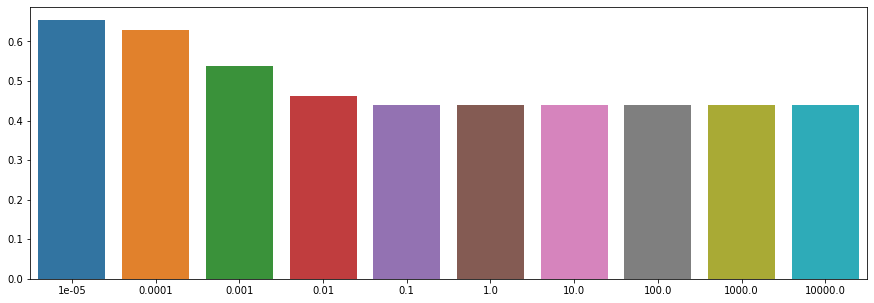

In [59]:
# plot log loss
plt.figure(figsize=(15,5)) 

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.5, 0.62])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

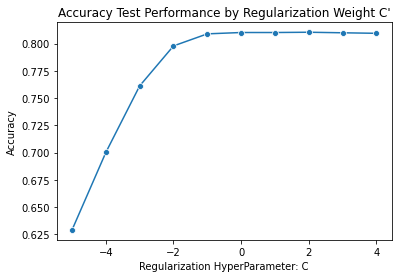

In [60]:
# plot accuracy
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

In [61]:
# final model will be with a C of 0.1
final_lr_l_loss, final_lr_acc, final_lr_clsf_report, final_lr_rmse, final_lr_r2 = train_test_LR(X_train, y_train, X_test, y_test, c=0.1)

### Decision Tree

In [62]:
def train_test_DT(X_train, y_train, X_test, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
    # 1. Create the Scikit-learn DecisionTreeClassifier model object
    dt_model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
    
    # 2. Fit the model to the training data below
    dt_model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data 
    class_label_predictions_dt = dt_model.predict(X_test)
  
    # 4. Compute the accuracy 
    dt_acc_score = accuracy_score(y_test, class_label_predictions_dt)
    
    # 5. Compute full classification report on 'class_label_predictions_dt'
    class_names = ['Non-Female', 'Female']
    dt_clsf_report = classification_report(y_test, class_label_predictions_dt, 
                                        target_names = class_names, output_dict=True)
    
    # 6. compute the rmse and r2 of the values
    dt_rmse = mean_squared_error(y_test, class_label_predictions_dt, squared = False)
    dt_r2 = r2_score(y_test, class_label_predictions_dt)
    
    dt_fi = dt_model.feature_importances_
        
    return dt_acc_score, dt_clsf_report, dt_rmse, dt_r2, dt_fi

In [63]:
print('Running Grid Search...')
param_grid = {
    'max_depth': [2**i for i in range(7)],
    'min_samples_leaf': [1, 5, 10, 20, 50, 75, 100, 250]}
    
# 1. Create a DecisionTreeRegressor model object without supplying arguments
dt_regressor = DecisionTreeRegressor()

# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [64]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.39


In [65]:
dt_best_params = dt_grid_search.best_params_

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 50}

In [66]:
# final model with parameters given by the grid search
final_dt_acc, final_dt_clsf_report, final_dt_rmse, final_dt_r2, dt_fi = train_test_DT(X_train, y_train, X_test, y_test, dt_best_params['min_samples_leaf'], dt_best_params['max_depth'], crit='entropy')

##### Identify the most important features for Decision Tree prediction

In [67]:
names_sorted = [x for _,x in sorted(zip(dt_fi, X_train.columns.values), reverse = True)]

Text(0, 0.5, 'Normalized importance')

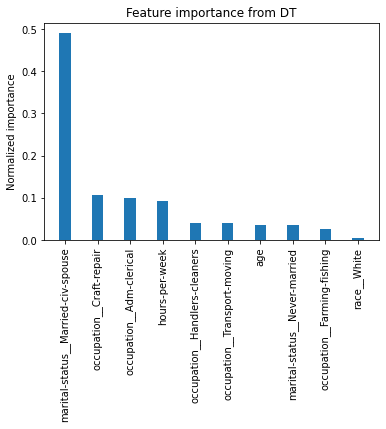

In [68]:
# graph the most important features for the sex classification 
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(dt_fi, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

### Random Forest

In [54]:
def train_test_RF(X_train, y_train, X_test, y_test, leaf, depth, n_estimators):
    # 1. Create the Scikit-learn RandomForestClassifier model object
    rf_model = RandomForestClassifier()
    
    # 2. Fit the model to the training data below
    rf_model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data using predit
    class_label_predictions_rf = rf_model.predict(X_test)
  
    # 4. Compute the accuracy 
    rf_acc_score = accuracy_score(y_test, class_label_predictions_rf)
    
    # 5. Compute full classification report on 'class_label_predictions_dt'
    class_names = ['Non-Female', 'Female']
    rf_clsf_report = classification_report(y_test, class_label_predictions_rf, 
                                        target_names = class_names, output_dict=True)
    
    # 6. compute the rmse and r2 of the values
    rf_rmse = mean_squared_error(y_test, class_label_predictions_rf, squared = False)
    rf_r2 = r2_score(y_test, class_label_predictions_rf)
        
    return rf_acc_score, rf_clsf_report, rf_rmse, rf_r2
    

In [50]:
# do grid search for Random Forest

print('Begin RF Grid Search...')

# Create the basic model
rf_classifier = RandomForestClassifier()

# Create the param grid
param_grid = {
    'n_estimators': [50, 200, 500],
    'max_depth': [None, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]
}

# Define the scoring metric
scoring = {
    'Accuracy': make_scorer(accuracy_score)}

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(
    rf_classifier, param_grid, scoring=scoring, cv=5, refit='Accuracy', verbose=2)

# Fit the grid search on the training data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", rf_best_params)
print("Best Score (Accuracy):", rf_best_score)

print('End')

Begin RF Grid Search...
Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=1, n_estimators=50, total=   2.0s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=1, n_estimators=50, total=   1.8s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=50, total=   2.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=50, total=   1.9s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=50, total=   2.0s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=200, total=   6.7s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=200, total=   6.6s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=200, total=   6.6s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=200 ..

[CV]  max_depth=None, min_samples_leaf=8, n_estimators=500, total=   6.9s
[CV] max_depth=None, min_samples_leaf=8, n_estimators=500 ............
[CV]  max_depth=None, min_samples_leaf=8, n_estimators=500, total=   7.4s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=None, min_samples_leaf=16, n_estimators=50, total=   0.9s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=None, min_samples_leaf=16, n_estimators=50, total=   0.8s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=None, min_samples_leaf=16, n_estimators=50, total=   0.9s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=None, min_samples_leaf=16, n_estimators=50, total=   0.8s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=50 ............
[CV]  max_depth=None, min_samples_leaf=16, n_estimators=50, total=   0.8s
[CV] max_depth=None, min_samples_leaf=16, n_estimators=2

[CV]  max_depth=20, min_samples_leaf=1, n_estimators=500, total=  10.4s
[CV] max_depth=20, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=20, min_samples_leaf=1, n_estimators=500, total=  10.6s
[CV] max_depth=20, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=20, min_samples_leaf=1, n_estimators=500, total=  11.0s
[CV] max_depth=20, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=20, min_samples_leaf=1, n_estimators=500, total=  11.6s
[CV] max_depth=20, min_samples_leaf=1, n_estimators=500 ..............
[CV]  max_depth=20, min_samples_leaf=1, n_estimators=500, total=  11.5s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=50, total=   1.2s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=50, total=   1.1s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=50 ...............
[

[CV]  max_depth=20, min_samples_leaf=16, n_estimators=200, total=   3.1s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=200 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=200, total=   3.3s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=500, total=   6.6s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=500, total=   7.1s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=500, total=   7.2s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=500, total=   6.2s
[CV] max_depth=20, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=16, n_estimators=500, total=   8.3s
[CV] max_depth=20, min_samples_leaf=32, n_estimators=50 .......

[CV]  max_depth=50, min_samples_leaf=2, n_estimators=200, total=   4.2s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=200, total=   4.7s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=200, total=   5.2s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=200 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=200, total=   3.9s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=500, total=   9.7s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=500, total=  10.4s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=50, min_samples_leaf=2, n_estimators=500, total=  13.2s
[CV] max_depth=50, min_samples_leaf=2, n_estimators=500 ..............

[CV]  max_depth=50, min_samples_leaf=32, n_estimators=50, total=   0.7s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=200, total=   2.6s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=200, total=   2.3s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=200, total=   2.4s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=200, total=   2.5s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=200, total=   2.6s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=500 .............
[CV]  max_depth=50, min_samples_leaf=32, n_estimators=500, total=   5.4s
[CV] max_depth=50, min_samples_leaf=32, n_estimators=500 .......

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed: 22.5min finished


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 500}
Best Score (Accuracy): 0.7996797654842128
End


In [55]:
print('Begin RF Implementation...')

# final model with parameters given by the grid search
final_rf_acc, final_rf_clsf_report, final_rf_rmse, final_rf_r2 = train_test_RF(
    X_train, y_train, X_test, y_test, 
    rf_best_params['min_samples_leaf'], rf_best_params['max_depth'], 
    rf_best_params['n_estimators'])

print('End')

Begin RF Implementation...
End


### Visualize Model Performance

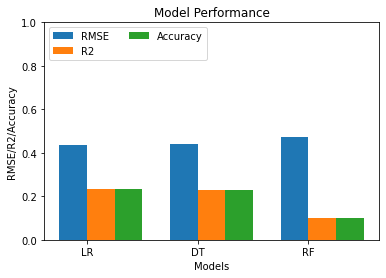

In [80]:
RMSE_Results = [final_lr_rmse, final_dt_rmse, final_rf_rmse]
R2_Results = [final_lr_r2, final_dt_r2, final_rf_r2]
ACC_Results = [final_lr_acc, final_dt_acc, final_rf_acc]

labels = ['LR', 'DT', 'RF']

rg= np.arange(3)
width = 0.25
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.bar(rg+(2*width), R2_Results, width, label='Accuracy')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2/Accuracy")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


Based on the results presented here, since we want high accuracy and R2 and smallr RMSE, it seems like the Random Froest is providing the worst results, while the Logisitc Regression and single Decision Tree do better. None of the models performce well. 
Due to time constaints and after some changes to hyperparameters and features, the project ends here, where I would choose the LR model. 
For future work, farther analysis of the features, limiting them, and farther work tune of hyperparameters may help to improve the model